# Loading The Data

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Summer_products.csv to Summer_products.csv


# Importing Relevant Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the Data

In [96]:
df = pd.read_csv('Summer_products.csv')

display(df)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [97]:
print("Number of records are: ", df.shape[0])
print("Number of variables are: ", df.shape[1])

# Getting number of records with at least one missing entry
missing_rec = df.isnull().any(axis = 1).sum()

# Getting number of records with no missing entry
non_missing_rec = df.shape[0] - df.isnull().any(axis = 1).sum()

print("Number of records with no missing entries:", non_missing_rec)

Number of records are:  1573
Number of variables are:  43
Number of records with no missing entries: 62


In [98]:
for col in df.columns.values:
    
    # Getting list of unique values in each column
    unique_list = pd.unique(df[col])

    print("Datatype of {} is: ".format(col), df[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))

    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(df[col])

    # Calculating total null values
    total_null = np.sum(is_null)

    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), df[col].shape[0] - total_null)

    print("---------------")

Datatype of title is:  object
Number of unique values for title are:  1201
Number of missing entries for title are:  0
Number of non-missing entries for title are:  1573
---------------
Datatype of title_orig is:  object
Number of unique values for title_orig are:  1203
Number of missing entries for title_orig are:  0
Number of non-missing entries for title_orig are:  1573
---------------
Datatype of price is:  float64
Number of unique values for price are:  127
Number of missing entries for price are:  0
Number of non-missing entries for price are:  1573
---------------
Datatype of retail_price is:  int64
Number of unique values for retail_price are:  104
Number of missing entries for retail_price are:  0
Number of non-missing entries for retail_price are:  1573
---------------
Datatype of currency_buyer is:  object
Number of unique values for currency_buyer are:  1
Number of missing entries for currency_buyer are:  0
Number of non-missing entries for currency_buyer are:  1573
-------

From a broad look at the data, uses_ad_boost, badge_local_product, badge_product_quality, badge_fast_shipping, product_color, shippin_option_name, shipping_is_express, origin_country and merchant_has_profile_picture can be classified as categorical variables; retail_price, units_sold, badges_count, product_variation_size_id, product_variation_inventory, shipping_option_price, countries_shipped_to, inventory_total are ordinal; the remaining data integer data types are native integers and the rest are continuous variables.


Since variables currency_buyer, theme and crawl_month take on only a single unique value, we can remove them from the dataset. Further, since variables has_urgency_banner, urgency_text and merchant_profile_picture have too many missing values, it's impractical to use them too. Finally, since tags takes on too many arbitrary values, it is best to remove it too.

In [99]:
# Cleaning up the variable product_variation_size_id to the maximum extent possible
df['product_variation_size_id'] = df['product_variation_size_id'].str.upper()
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('.', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE ', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE-', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE/', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('CHOOSE A SIZE', 'NA')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SUIT-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SUIT S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('US-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('S PINK', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('6XL', 'XXXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('5XL', 'XXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('4XL', 'XXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('3XL', 'XXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('2XL', 'XXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace(' ', '')

In [100]:
# Removing variables with only 1 unique value
del df['currency_buyer']
del df['theme']
del df['crawl_month']

# Removing variables with too many missing entries
del df['has_urgency_banner']
del df['urgency_text']
del df['merchant_profile_picture']

# Removing variables with bad info
del df['tags']

# Replacing missing rating values by 0 
df['rating_five_count'] = df['rating_five_count'].fillna(value = 0)
df['rating_four_count'] = df['rating_four_count'].fillna(value = 0)
df['rating_three_count'] = df['rating_three_count'].fillna(value = 0)
df['rating_two_count'] = df['rating_two_count'].fillna(value = 0)
df['rating_one_count'] = df['rating_one_count'].fillna(value = 0)

# Replacing blank entries in strings by NA
df['product_color'] = df['product_color'].fillna(value = 'NA')
df['product_variation_size_id'] = df['product_variation_size_id'].fillna(value = 'NA')
df['origin_country'] = df['origin_country'].fillna(value = 'NA')
df['merchant_name'] = df['merchant_name'].fillna(value = 'NA')
df['merchant_info_subtitle'] = df['merchant_info_subtitle'].fillna(value = 'NA')

In [103]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64


In [104]:
display(df)

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,white,M,50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,green,XS,50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,leopardprint,XS,1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,black,M,50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,yellow,S,1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,navyblue,S,50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,lightblue,S,2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,white,S,15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d

# Analysis of Discrete Variables

Mode value of retail_price is:  177
Entropy value of retail_price is:  3.582045801134226


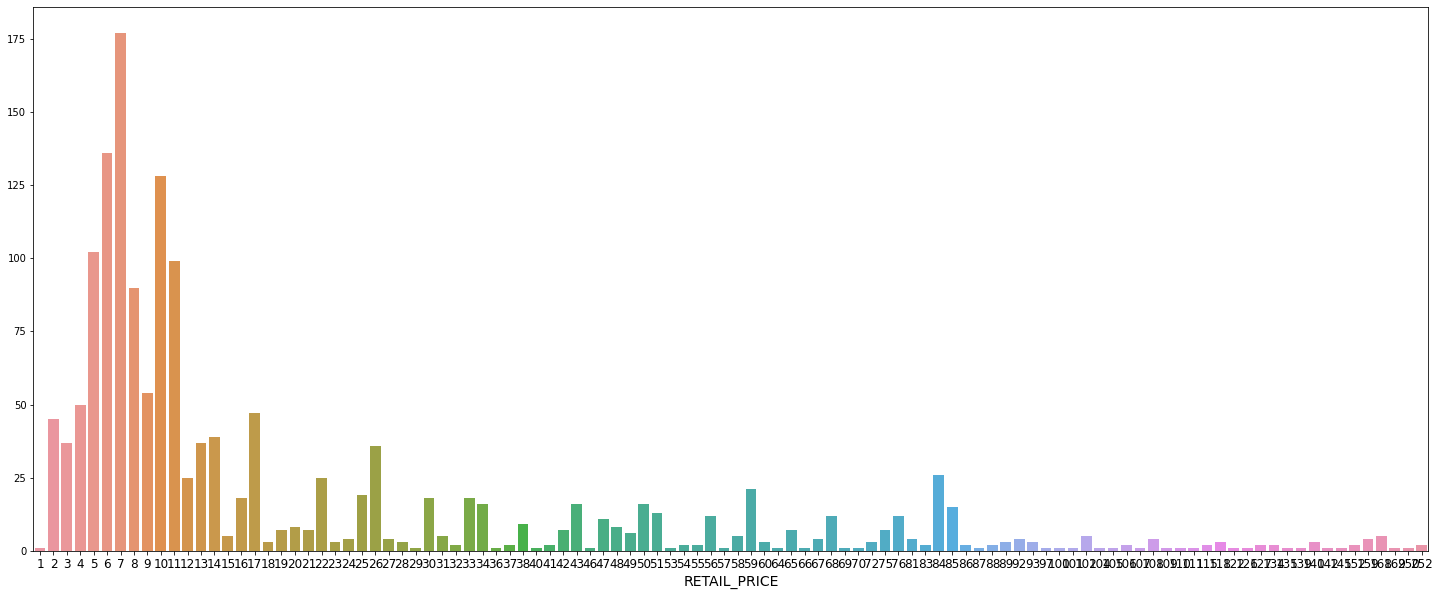

Mode value of units_sold is:  509
Entropy value of units_sold is:  1.7939035227014986


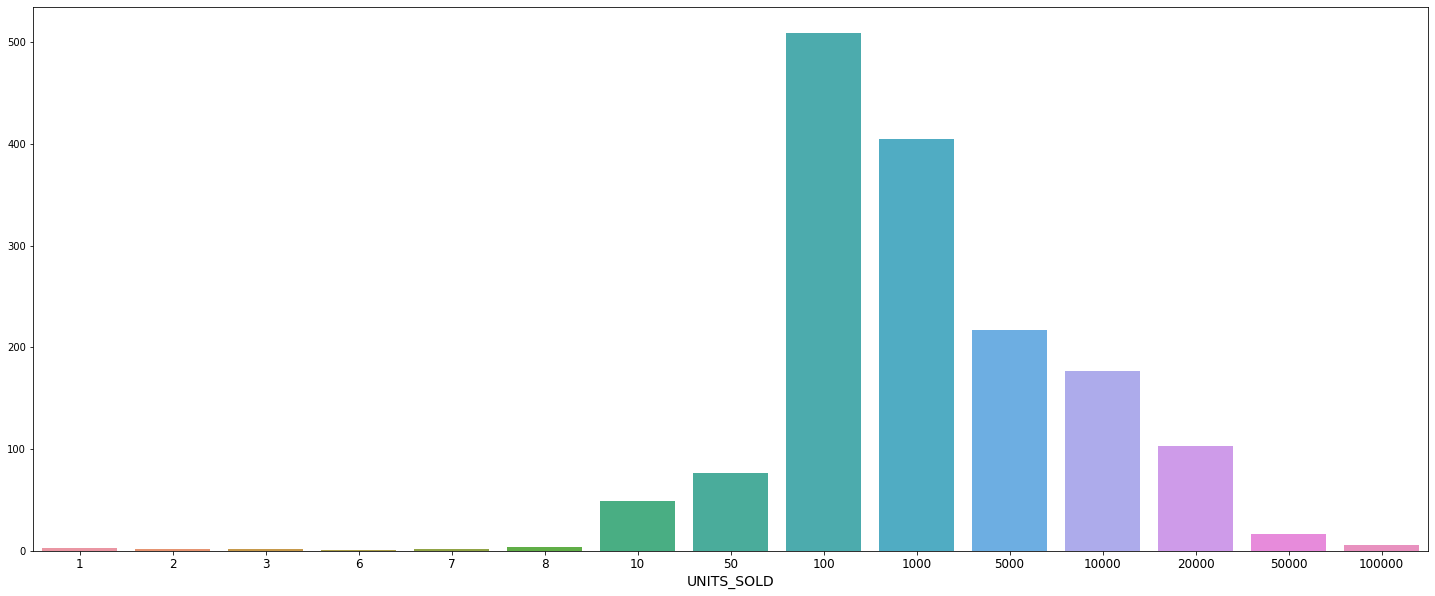

Mode value of uses_ad_boosts is:  892
Entropy value of uses_ad_boosts is:  0.684123424514612


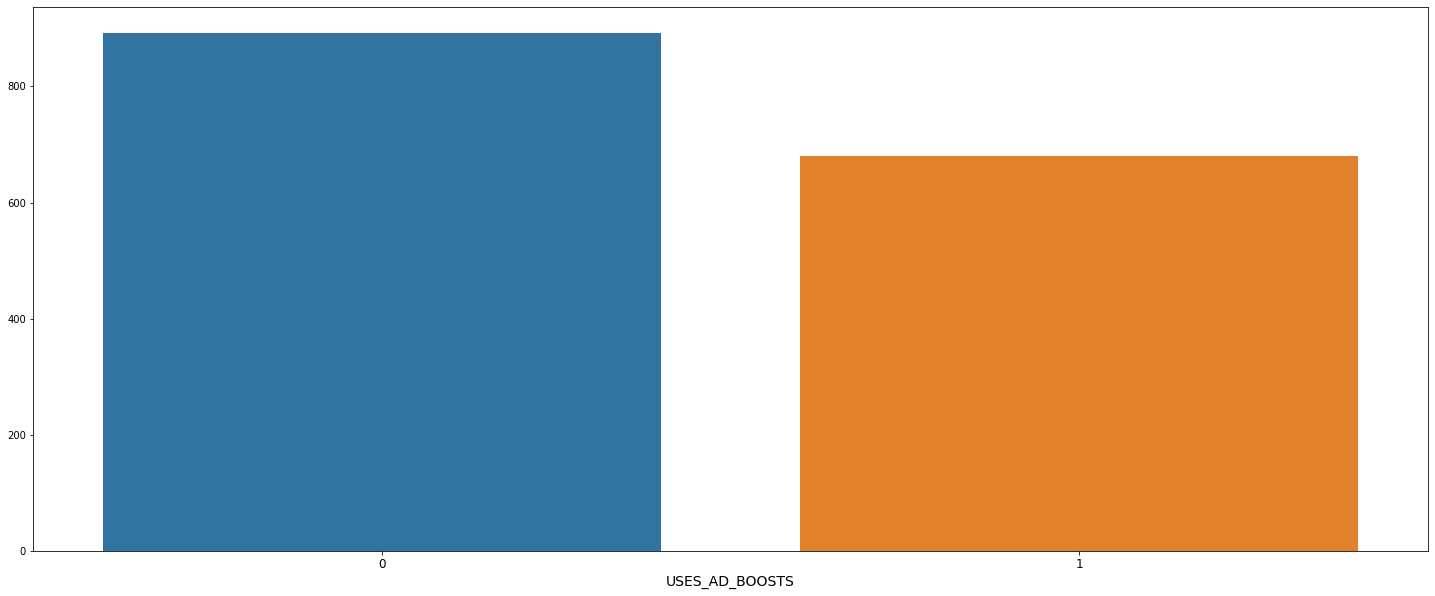

Mode value of badges_count is:  1422
Entropy value of badges_count is:  0.34790605890694465


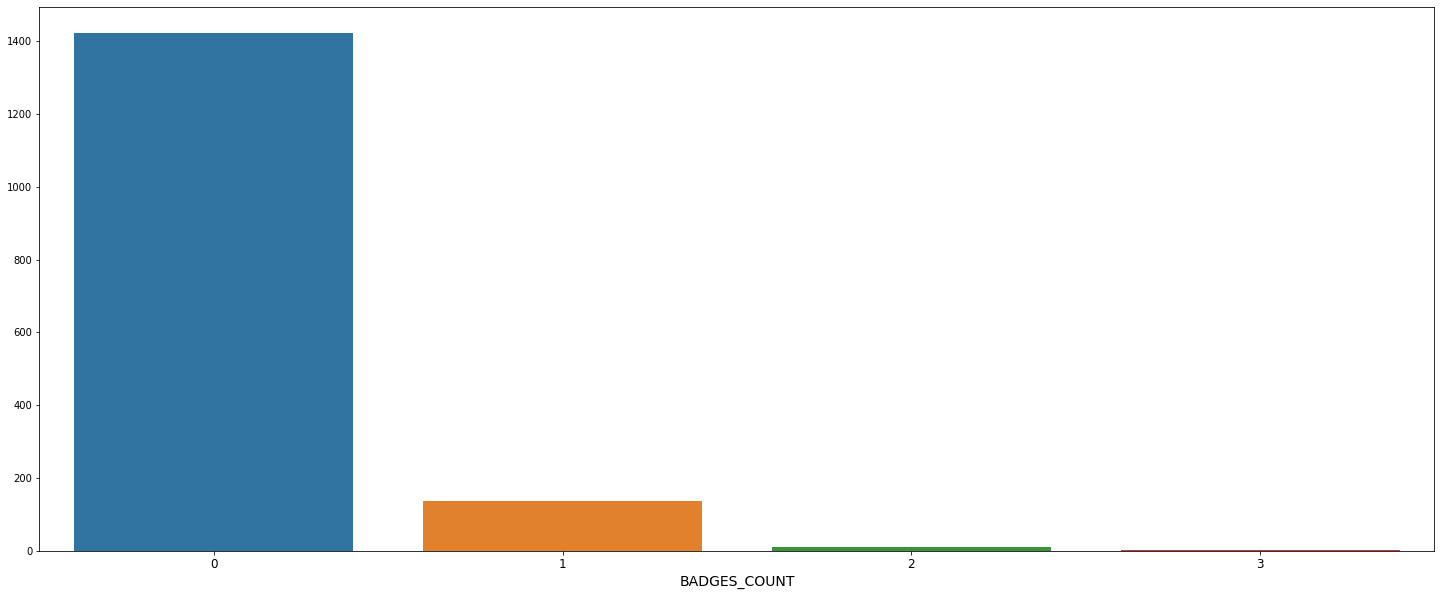

Mode value of badge_local_product is:  1544
Entropy value of badge_local_product is:  0.09188868176621313


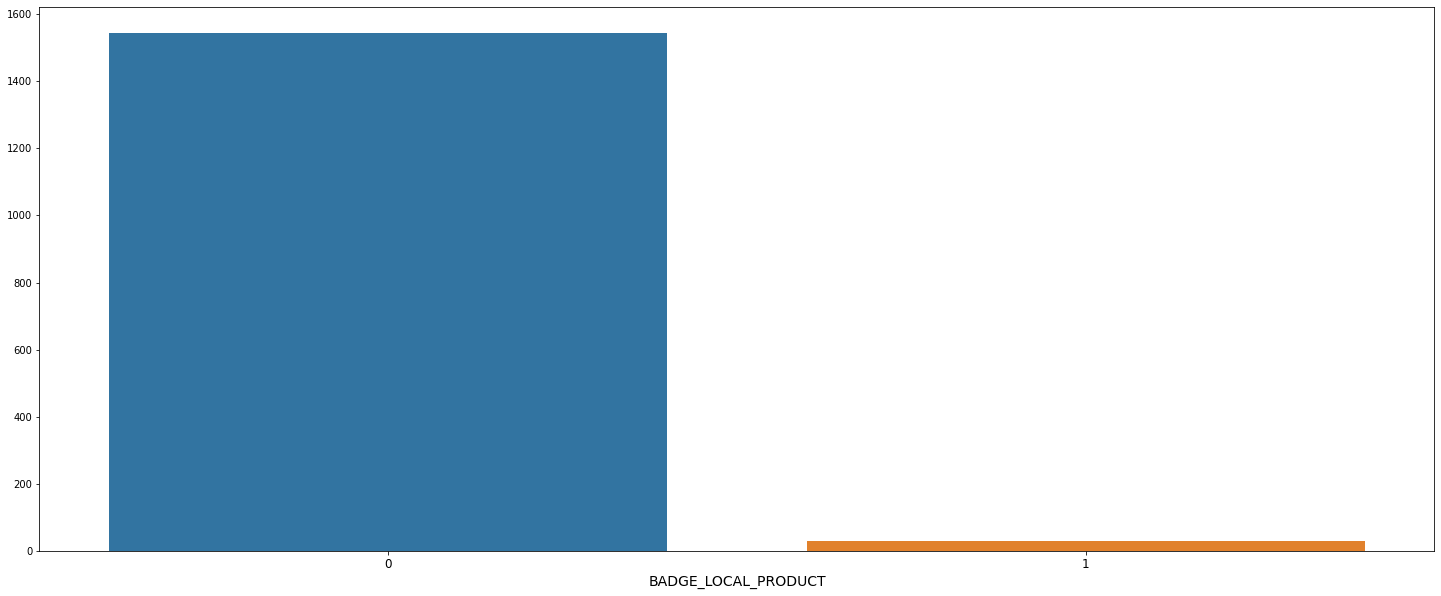

Mode value of badge_product_quality is:  1456
Entropy value of badge_product_quality is:  0.2648244730258604


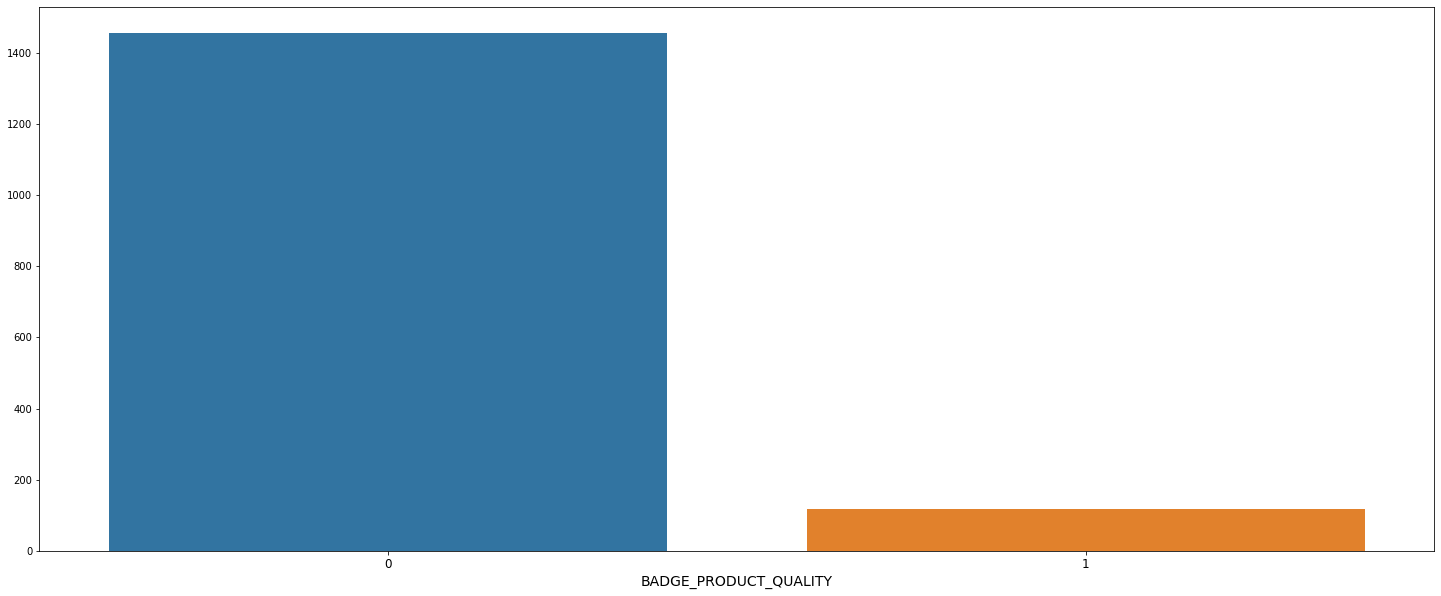

Mode value of badge_fast_shipping is:  1553
Entropy value of badge_fast_shipping is:  0.06813252682115713


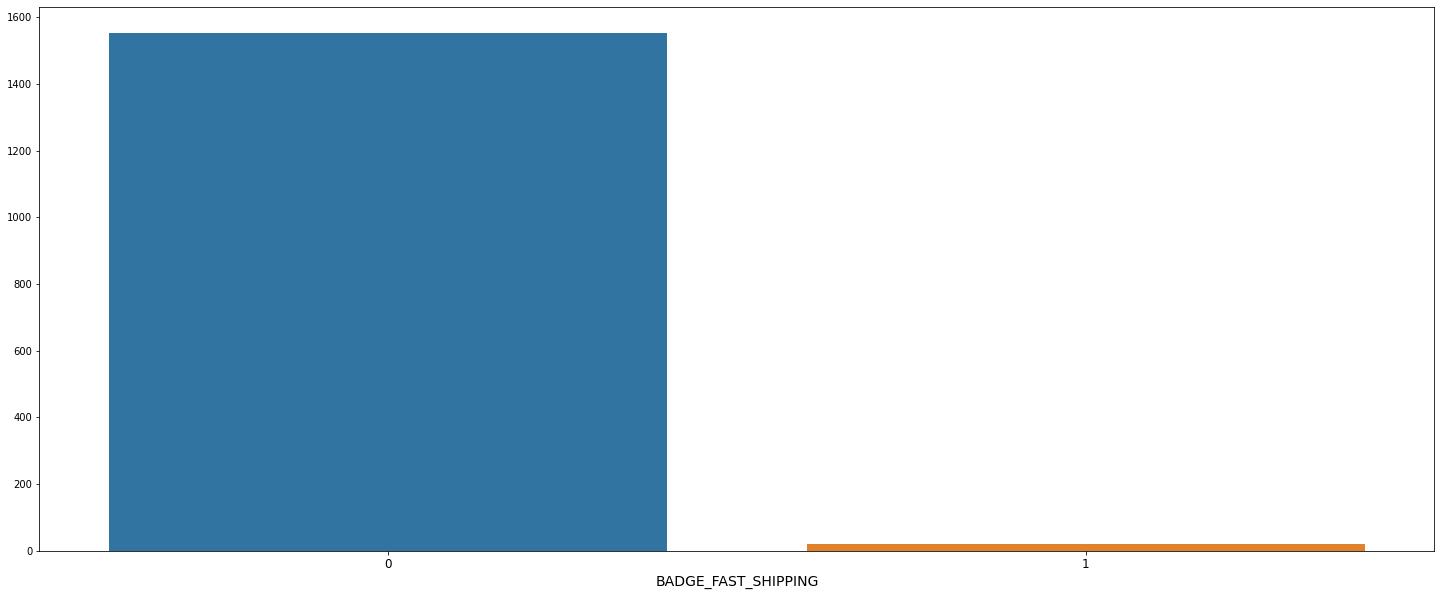

Mode value of product_color is:  302
Entropy value of product_color is:  3.051240971830538


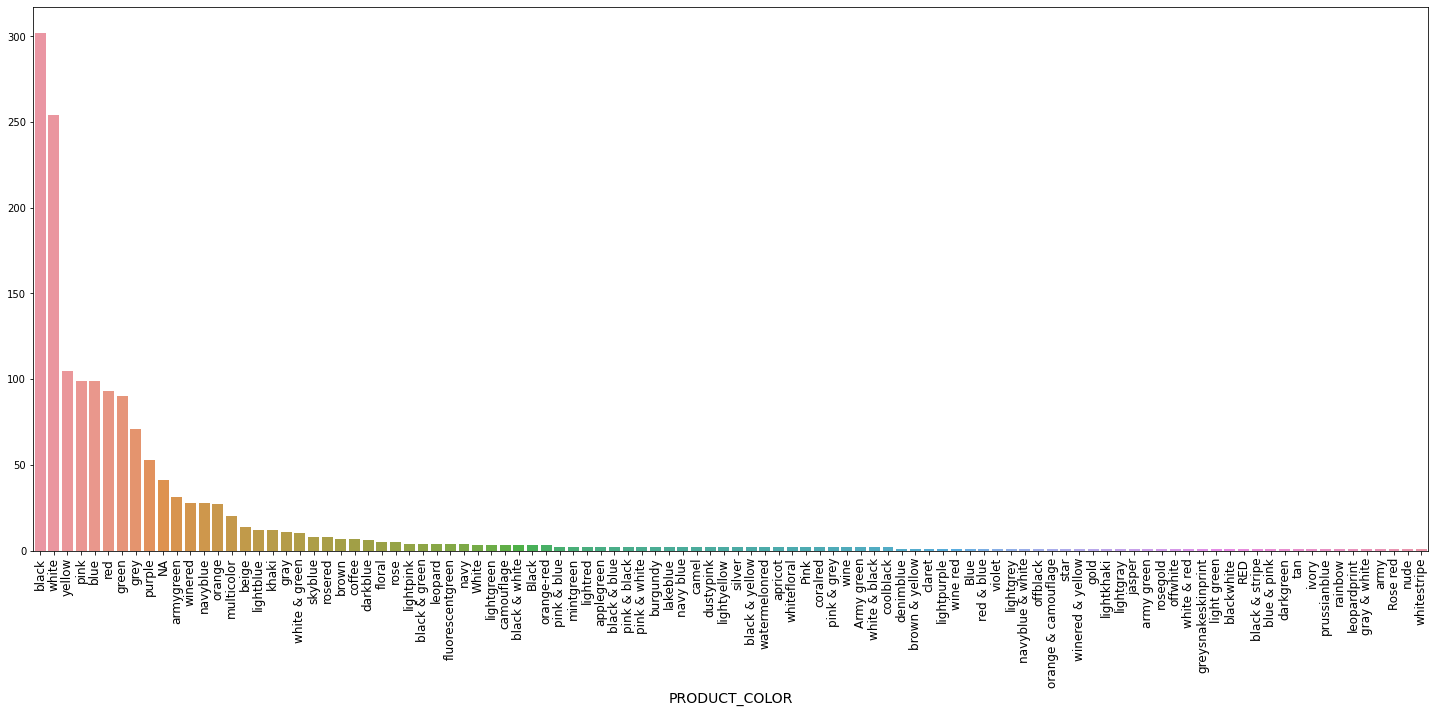

Mode value of product_variation_size_id is:  683
Entropy value of product_variation_size_id is:  1.8566711013781505


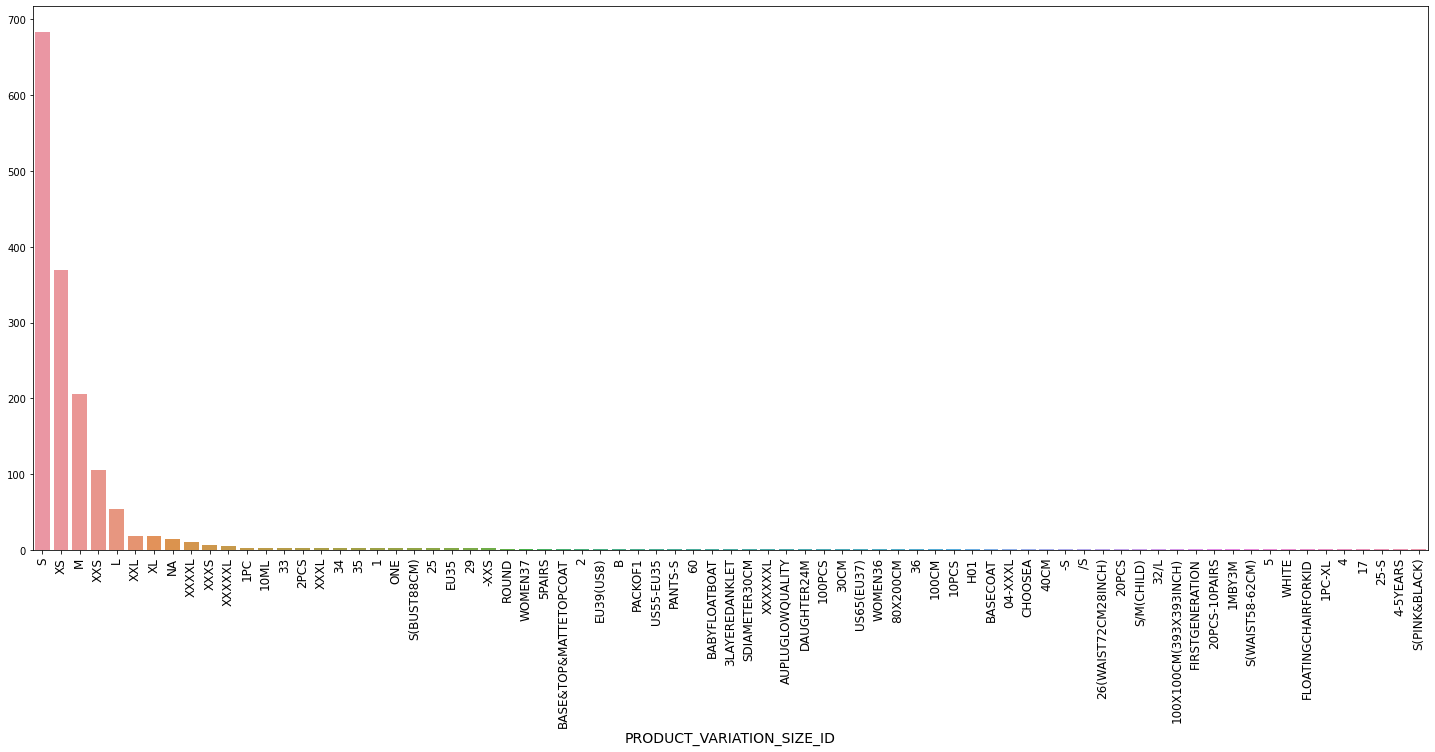

Mode value of product_variation_inventory is:  907
Entropy value of product_variation_inventory is:  1.9236495283938828


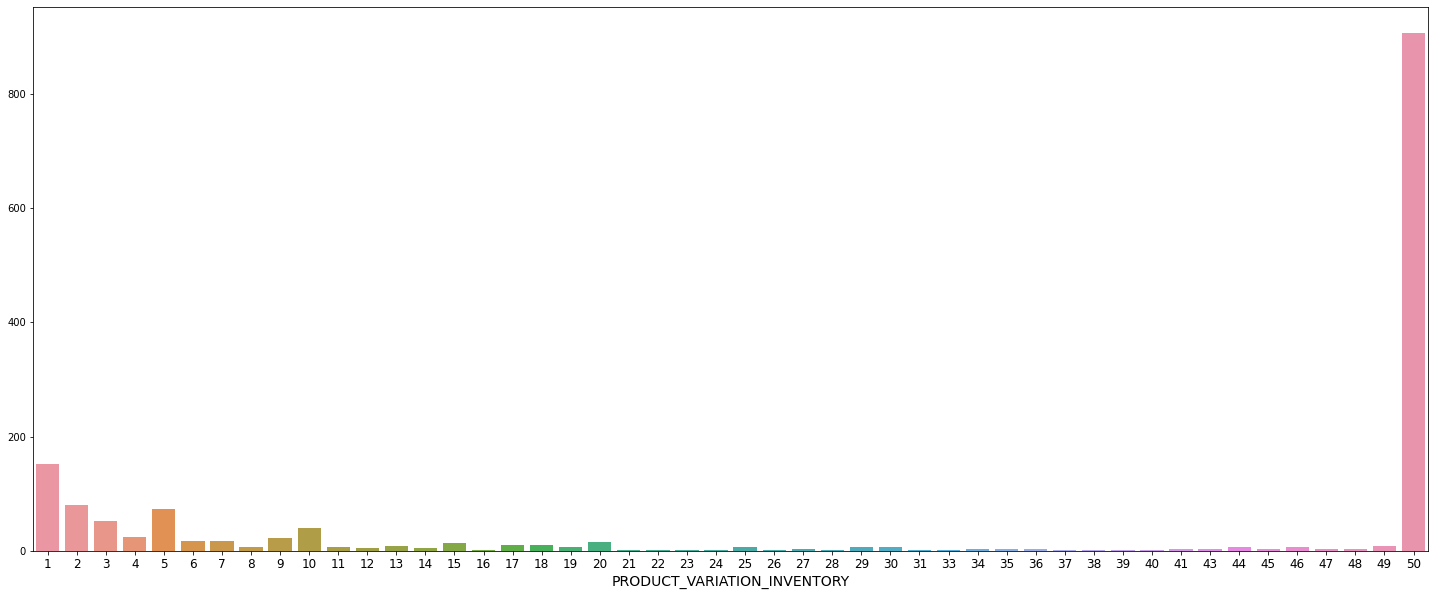

Mode value of shipping_option_name is:  1508
Entropy value of shipping_option_name is:  0.2649021497219723


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s

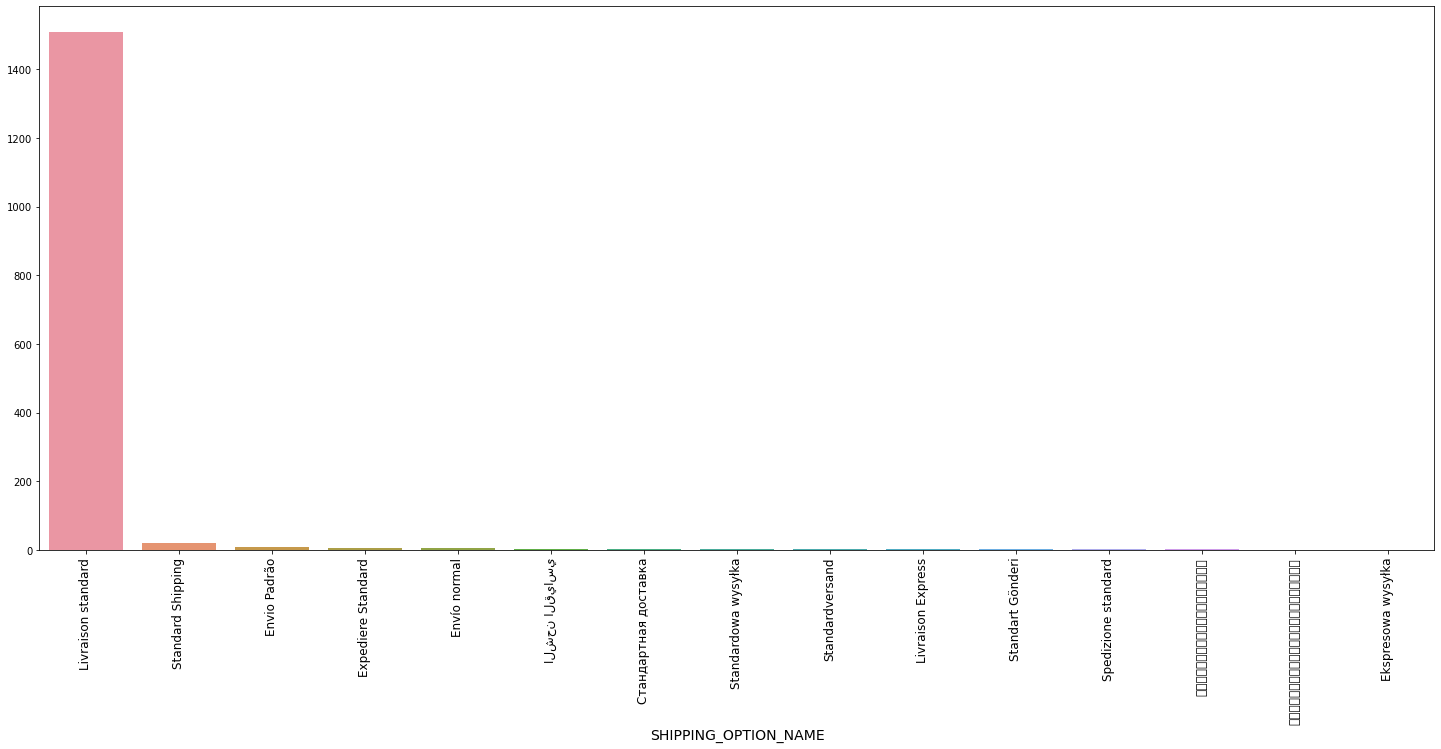

Mode value of shipping_option_price is:  619
Entropy value of shipping_option_price is:  1.3380035832376478


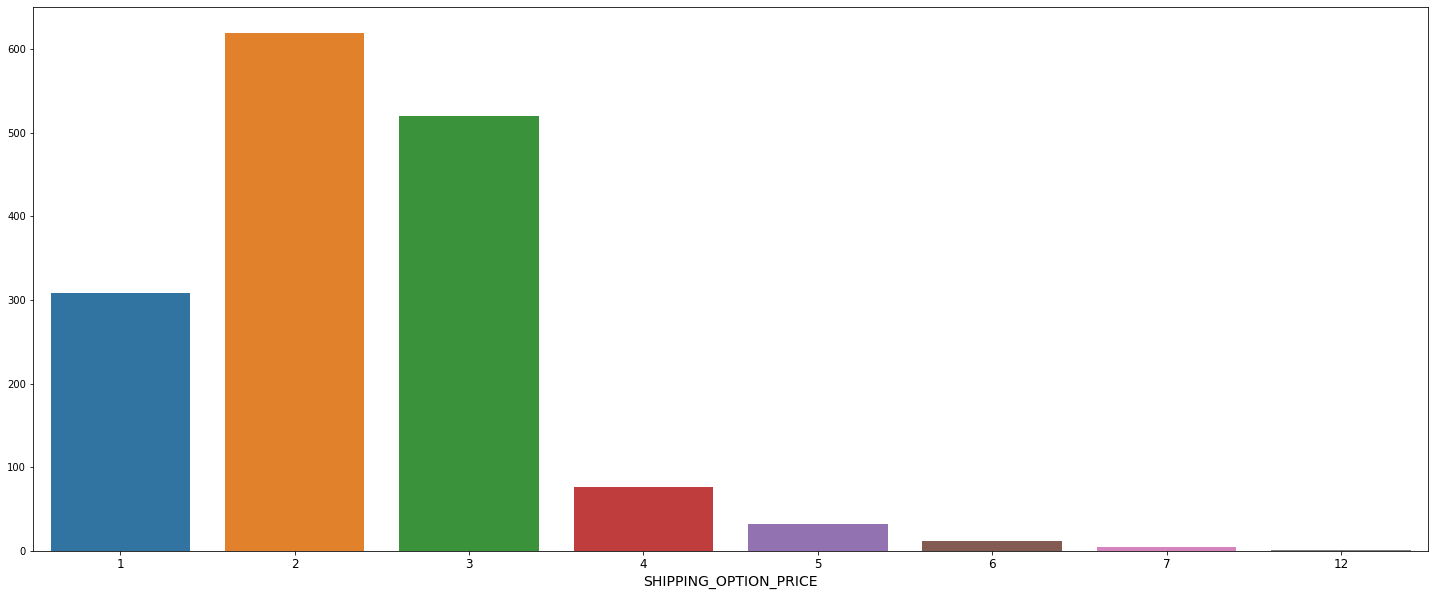

Mode value of shipping_is_express is:  1569
Entropy value of shipping_is_express is:  0.017732162764185173


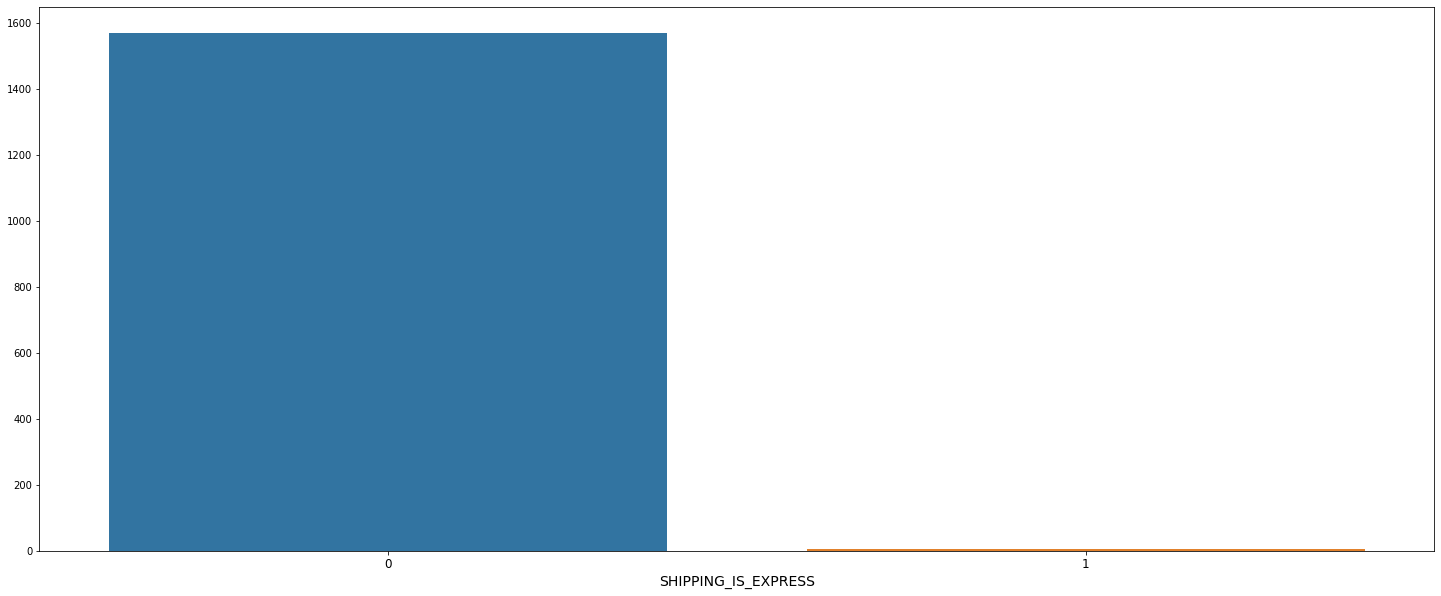

Mode value of countries_shipped_to is:  171
Entropy value of countries_shipped_to is:  3.6578055933131806


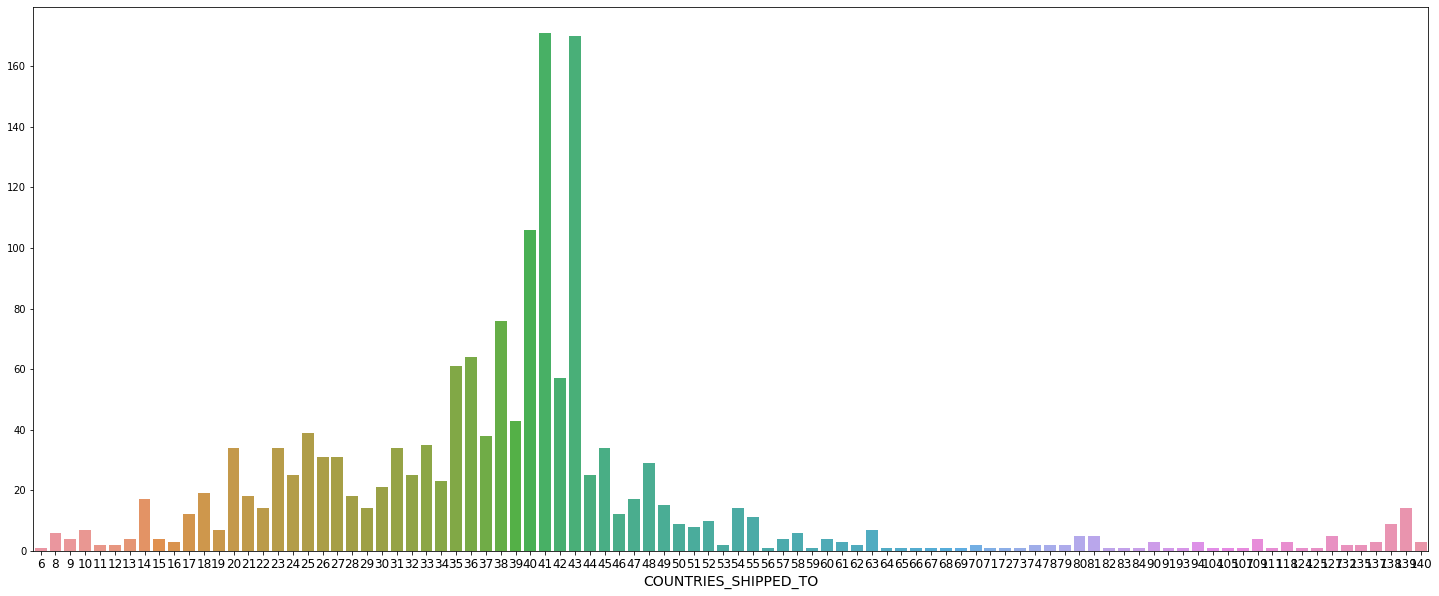

Mode value of inventory_total is:  1563
Entropy value of inventory_total is:  0.05225000044550747


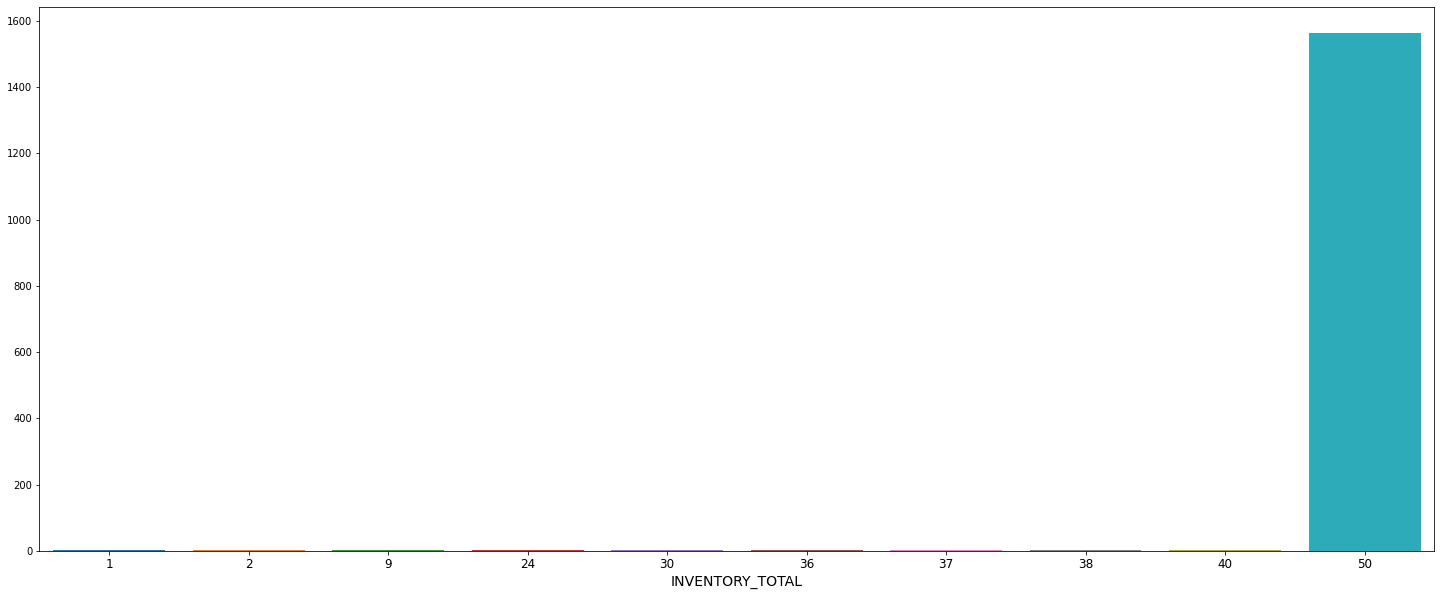

Mode value of origin_country is:  1516
Entropy value of origin_country is:  0.19800700256622564


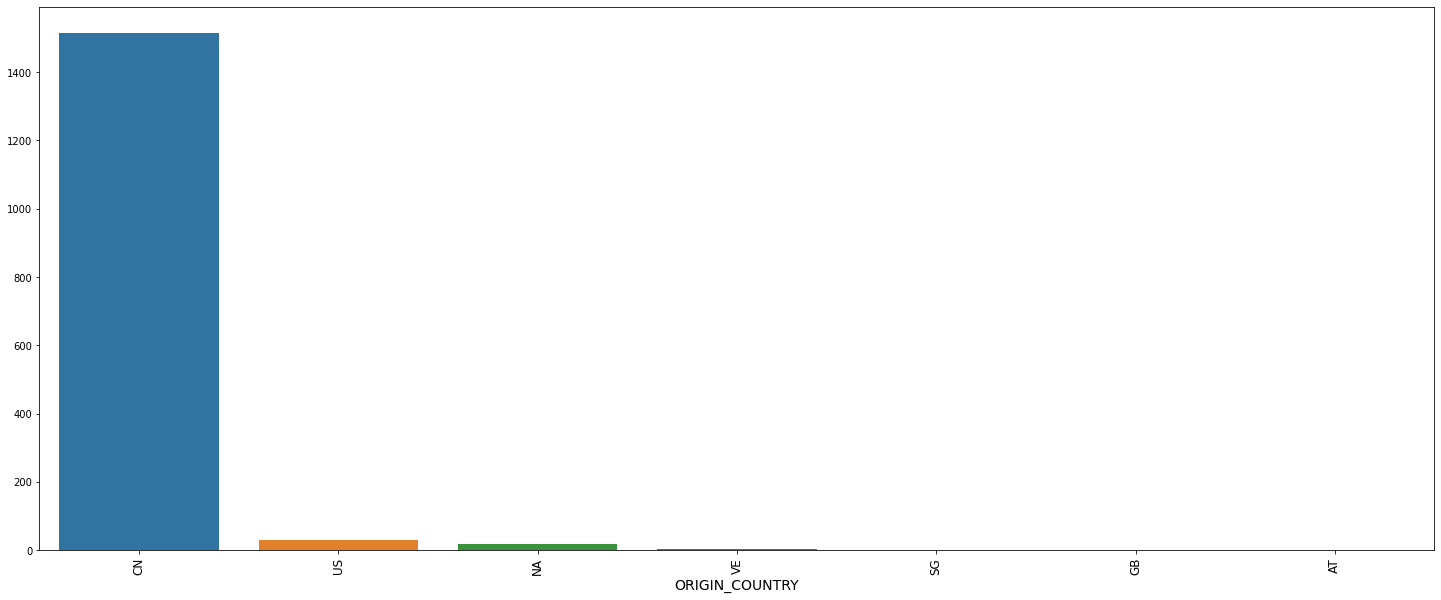

Mode value of merchant_has_profile_picture is:  1347
Entropy value of merchant_has_profile_picture is:  0.4115781150987757


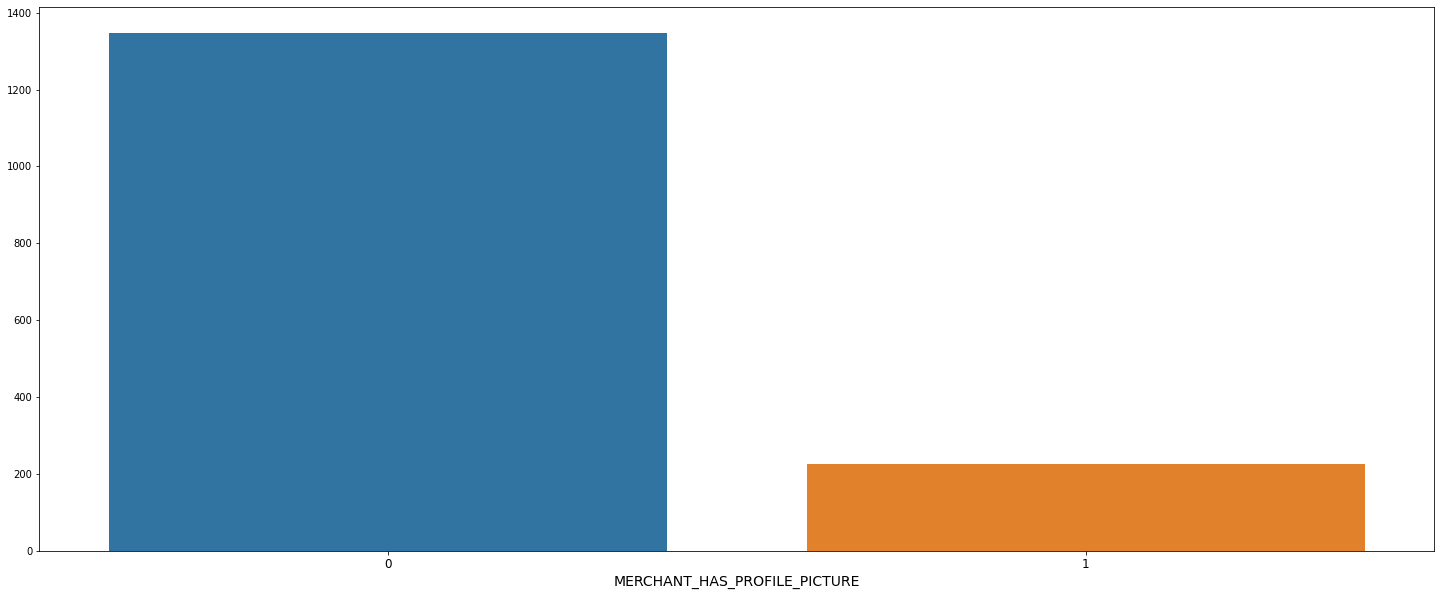

In [117]:
from scipy import stats

for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'object') and len(pd.unique(df[col])) < 120:

        # Getting the total records for a variable
        total_entries = len(df[col])

        # Setting the figure size
        plt.figure(figsize=(25,10))

        # Getting the list of values assumed by the variable
        var_values = df[col].value_counts().index.tolist()

        # Getting the corresponding frequency of values assumed by the variable
        freq_values = df[col].value_counts().values.tolist()

        # Plotting the bar plot
        sb.barplot(x = var_values, y = freq_values)

        # Calculating the probability density of the values
        prob_values = [i/float(sum(freq_values)) for i in freq_values]

        # Calculating the mode and entropy of the distribution
        mode = max(freq_values)
        entropy = stats.entropy(prob_values)

        # Rotating the labels in the x-axis
        if (df[col].dtypes == 'object'):
            plt.xticks(rotation=90)
        
        # Adjusting label size in the x-axis
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.xlabel(col.upper(), fontsize = 14)
        
        
        print("Mode value of {} is: ".format(col), mode)
        print("Entropy value of {} is: ".format(col), entropy)
        
        plt.show()

From all the bar graphs, we can observe trends and get a look at which values are assumed by a particular variable the most frequently like most people buy products of size 'S'.

# Analysis of Continuous Variables

Mean value of price is:  8.325371900826434
Variance value of price is:  15.460858465291455
Skew value of price is:  1.31589130005404
Minimum value of price is:  1.0
Maximum value of price is:  49.0
Median value of price is:  8.0
25th percentile value of price is:  5.8100000000000005
75th percentile value of price is:  11.0
Inter-quartile range of price is:  5.1899999999999995


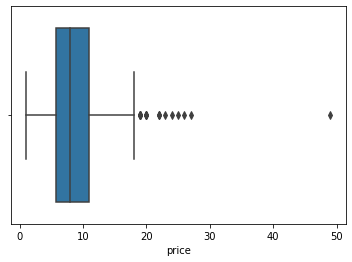

---------------
Mean value of rating is:  3.8208963763509174
Variance value of rating is:  0.2656099466344443
Skew value of rating is:  -0.530912194657049
Minimum value of rating is:  1.0
Maximum value of rating is:  5.0
Median value of rating is:  3.85
25th percentile value of rating is:  3.55
75th percentile value of rating is:  4.11
Inter-quartile range of rating is:  0.5600000000000005


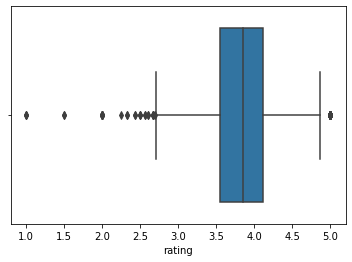

---------------
Mean value of rating_count is:  889.659249841068
Variance value of rating_count is:  3935973.619184426
Skew value of rating_count is:  4.789467043212753
Minimum value of rating_count is:  0
Maximum value of rating_count is:  20744
Median value of rating_count is:  150.0
25th percentile value of rating_count is:  24.0
75th percentile value of rating_count is:  855.0
Inter-quartile range of rating_count is:  831.0


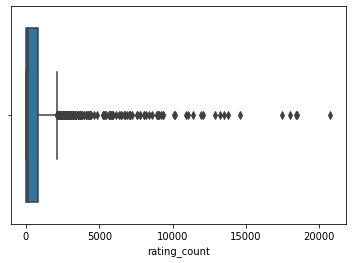

---------------
Mean value of rating_five_count is:  429.6115702479339
Variance value of rating_five_count is:  938733.6550059954
Skew value of rating_five_count is:  4.996012721386151
Minimum value of rating_five_count is:  0.0
Maximum value of rating_five_count is:  11548.0
Median value of rating_five_count is:  72.0
25th percentile value of rating_five_count is:  10.0
75th percentile value of rating_five_count is:  394.0
Inter-quartile range of rating_five_count is:  384.0


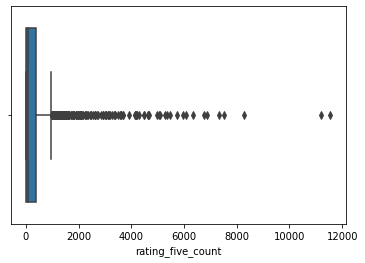

---------------
Mean value of rating_four_count is:  174.46153846153845
Variance value of rating_four_count is:  156718.21178312847
Skew value of rating_four_count is:  4.728900865449208
Minimum value of rating_four_count is:  0.0
Maximum value of rating_four_count is:  4152.0
Median value of rating_four_count is:  29.0
25th percentile value of rating_four_count is:  4.0
75th percentile value of rating_four_count is:  163.0
Inter-quartile range of rating_four_count is:  159.0


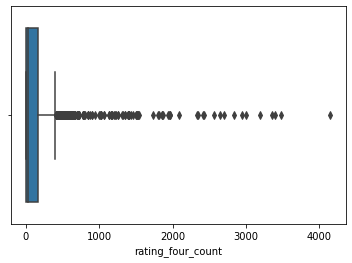

---------------
Mean value of rating_three_count is:  130.7005721551176
Variance value of rating_three_count is:  94873.43127829874
Skew value of rating_three_count is:  5.243572130613012
Minimum value of rating_three_count is:  0.0
Maximum value of rating_three_count is:  3658.0
Median value of rating_three_count is:  22.0
25th percentile value of rating_three_count is:  3.0
75th percentile value of rating_three_count is:  121.0
Inter-quartile range of rating_three_count is:  118.0


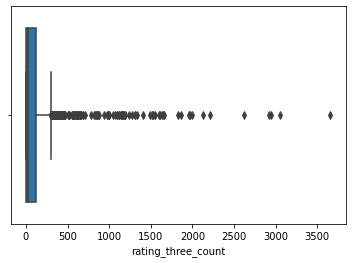

---------------
Mean value of rating_two_count is:  61.888747616020346
Variance value of rating_two_count is:  22362.181635389872
Skew value of rating_two_count is:  5.738682933174532
Minimum value of rating_two_count is:  0.0
Maximum value of rating_two_count is:  2003.0
Median value of rating_two_count is:  10.0
25th percentile value of rating_two_count is:  1.0
75th percentile value of rating_two_count is:  59.0
Inter-quartile range of rating_two_count is:  58.0


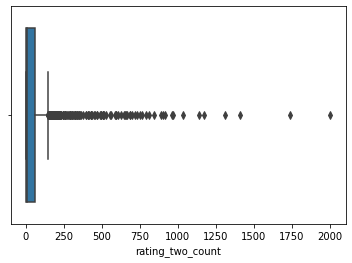

---------------
Mean value of rating_one_count is:  92.99682136045773
Variance value of rating_one_count is:  44771.31869217973
Skew value of rating_one_count is:  5.4512526136436215
Minimum value of rating_one_count is:  0.0
Maximum value of rating_one_count is:  2789.0
Median value of rating_one_count is:  18.0
25th percentile value of rating_one_count is:  3.0
75th percentile value of rating_one_count is:  90.0
Inter-quartile range of rating_one_count is:  87.0


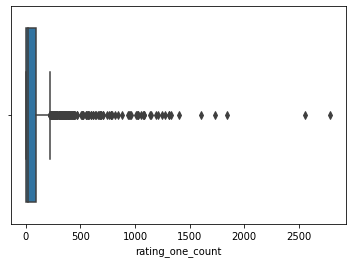

---------------
Mean value of merchant_rating_count is:  26495.832803560075
Variance value of merchant_rating_count is:  6158240182.841613
Skew value of merchant_rating_count is:  15.889018735313044
Minimum value of merchant_rating_count is:  0
Maximum value of merchant_rating_count is:  2174765
Median value of merchant_rating_count is:  7936.0
25th percentile value of merchant_rating_count is:  1987.0
75th percentile value of merchant_rating_count is:  24564.0
Inter-quartile range of merchant_rating_count is:  22577.0


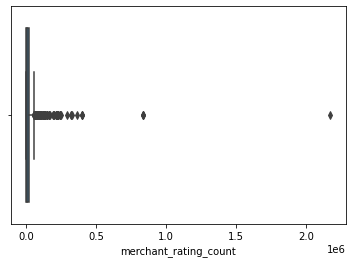

---------------
Mean value of merchant_rating is:  4.032345119297898
Variance value of merchant_rating is:  0.04192993259139317
Skew value of merchant_rating is:  -1.029755428442294
Minimum value of merchant_rating is:  2.333333333333333
Maximum value of merchant_rating is:  5.0
Median value of merchant_rating is:  4.0406504065040645
25th percentile value of merchant_rating is:  3.917353418992764
75th percentile value of merchant_rating is:  4.161796722814255
Inter-quartile range of merchant_rating is:  0.2444433038214915


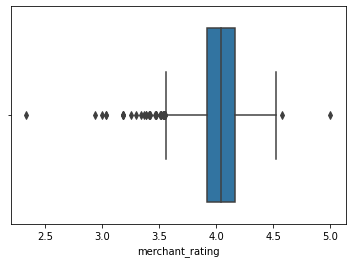

---------------


In [118]:
for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 120:

        # Calculating the various parameters of the distribution
        print("Mean value of {} is: ".format(col), df[col].mean())
        print("Variance value of {} is: ".format(col), df[col].var())
        print("Skew value of {} is: ".format(col), df[col].skew())
        print("Minimum value of {} is: ".format(col), df[col].min())
        print("Maximum value of {} is: ".format(col), df[col].max())
        print("Median value of {} is: ".format(col), df[col].median())
        print("25th percentile value of {} is: ".format(col), df[col].quantile(0.25))
        print("75th percentile value of {} is: ".format(col), df[col].quantile(0.75))
        print("Inter-quartile range of {} is: ".format(col), df[col].quantile(0.75) - df[col].quantile(0.25))

        # Plotting the box and whiskers plot
        sb.boxplot(df[col])
        plt.show()

        print("---------------")

From the analysis of the above continuous variables, we can see that most of the variables are highly right skewed except for the variables rating and merchant_rating which are somewhat left skewed.

Variable:  price


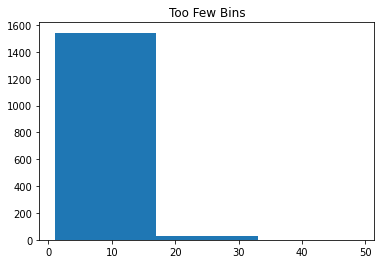

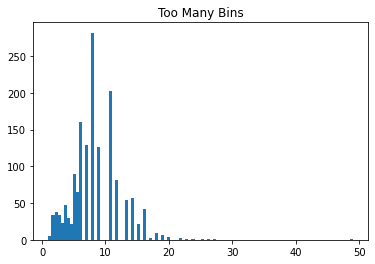

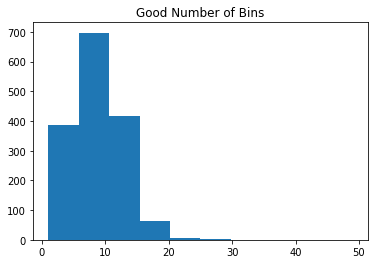

--------------
Variable:  rating


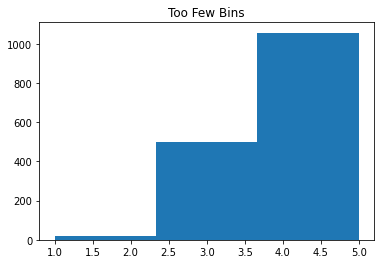

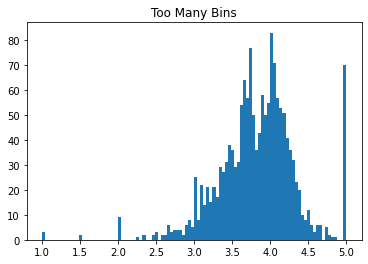

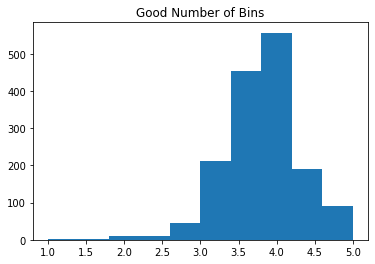

--------------
Variable:  rating_count


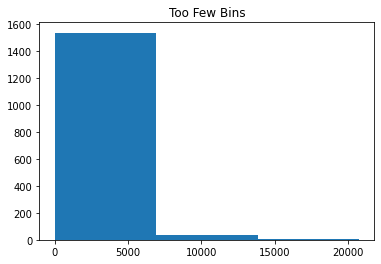

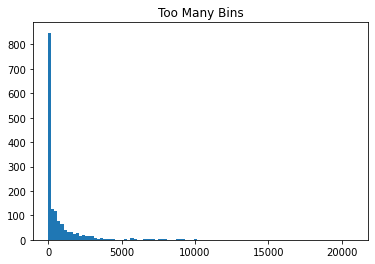

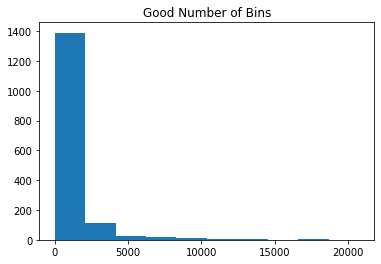

--------------
Variable:  rating_five_count


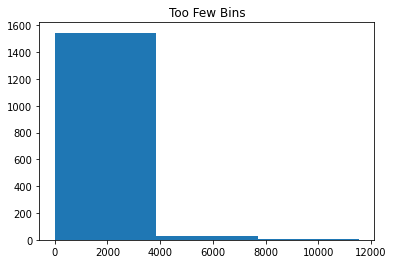

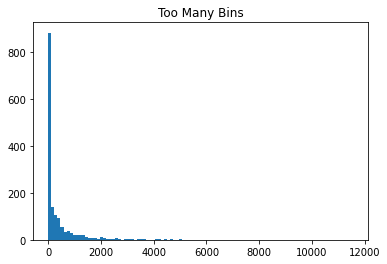

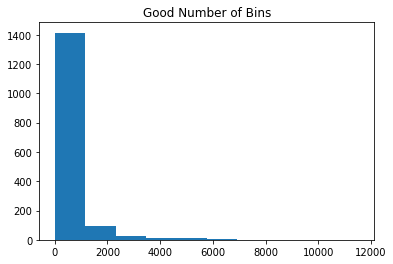

--------------
Variable:  rating_four_count


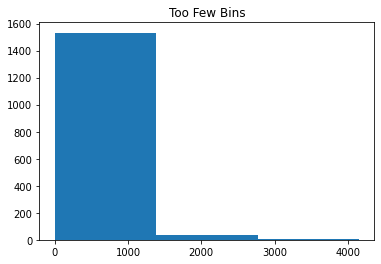

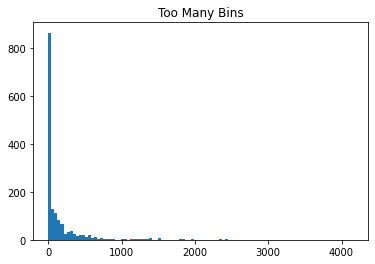

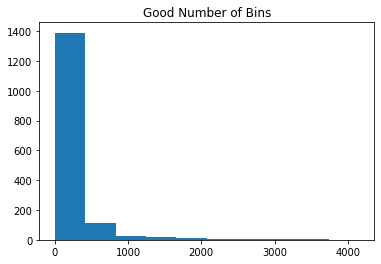

--------------
Variable:  rating_three_count


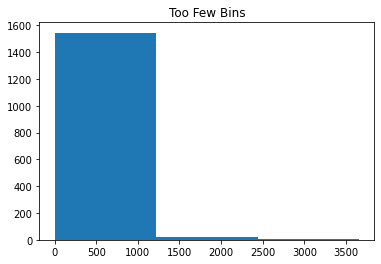

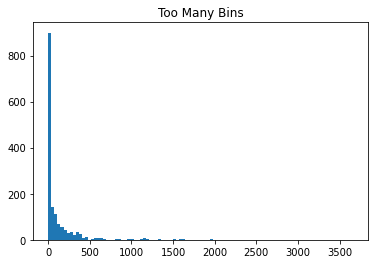

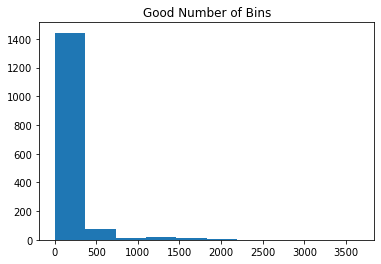

--------------
Variable:  rating_two_count


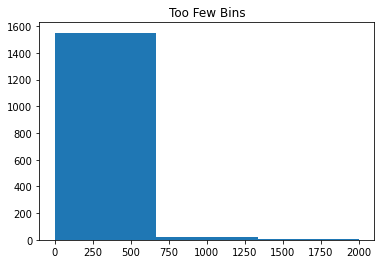

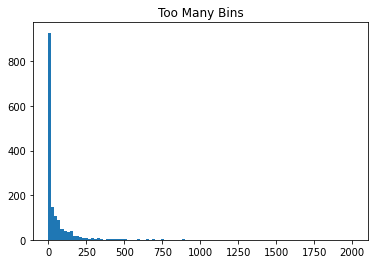

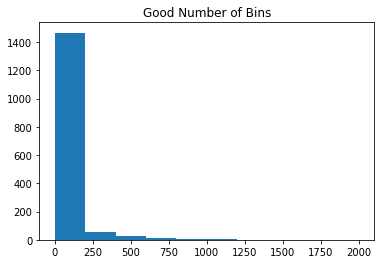

--------------
Variable:  rating_one_count


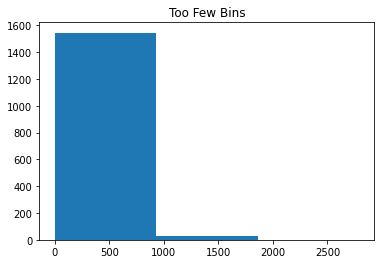

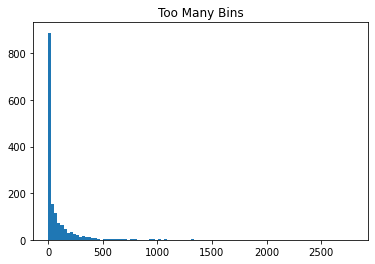

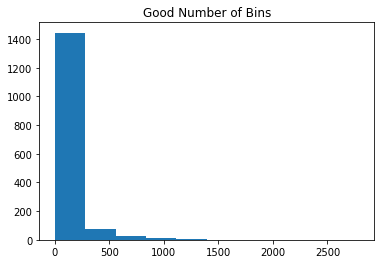

--------------
Variable:  merchant_rating_count


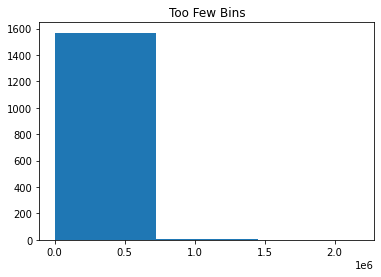

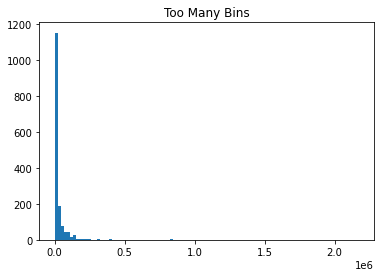

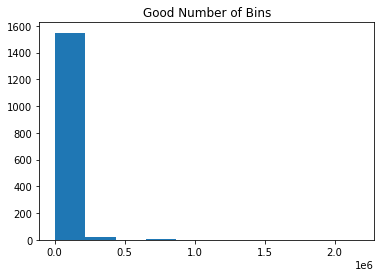

--------------
Variable:  merchant_rating


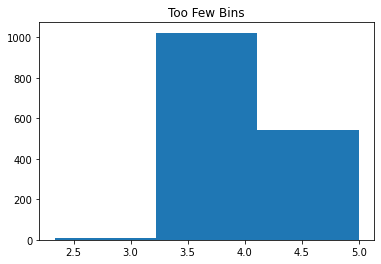

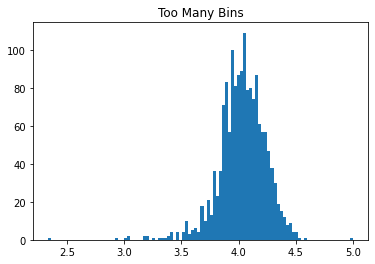

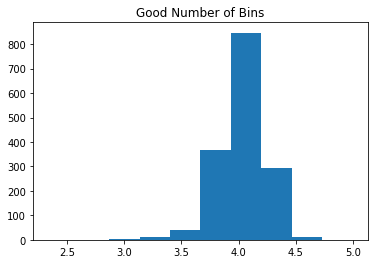

--------------


In [129]:
for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 120:

        print("Variable: ", col)
        
        # Too few bins
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(1, 1, 1)
        ax1.set_title("Too Few Bins")
        ax1.hist(df[col], bins = 3)

        # Too many bins
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(1, 1, 1)
        ax2.set_title("Too Many Bins")
        ax2.hist(df[col], bins = 100)

        # Good number of bins
        fig3 = plt.figure()
        ax3 = fig3.add_subplot(1, 1, 1)
        ax3.set_title("Good Number of Bins")
        ax3.hist(df[col], bins = 10)

        plt.show()

        print("--------------")

# QQ Plot of All Continuous Variables

QQ plot for price against the normal distribution


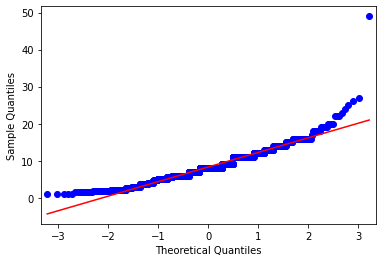

QQ plot for the natural log of price against the normal distribution


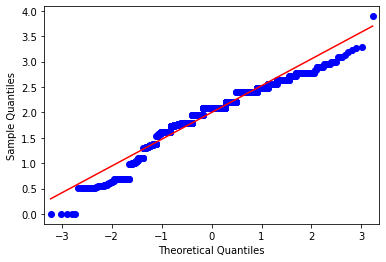

-----------------
QQ plot for rating against the normal distribution


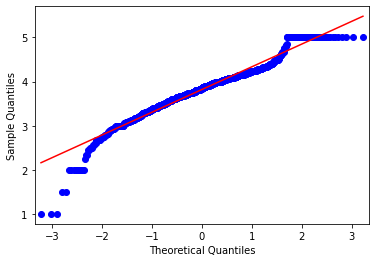

QQ plot for the natural log of rating against the normal distribution


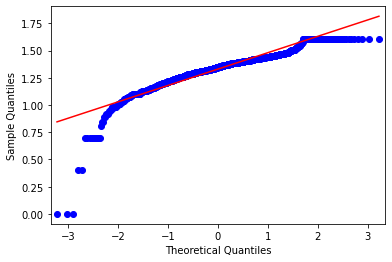

-----------------
QQ plot for rating_count against the normal distribution


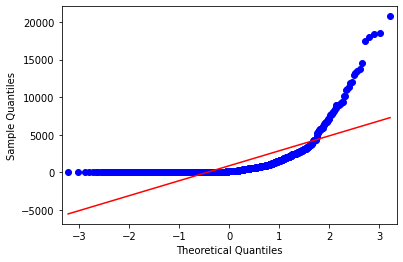

QQ plot for the natural log of rating_count against the normal distribution


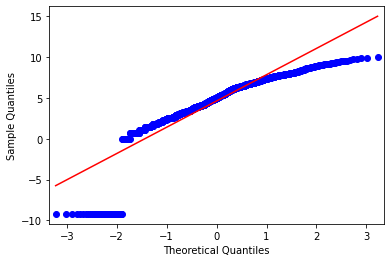

-----------------
QQ plot for rating_five_count against the normal distribution


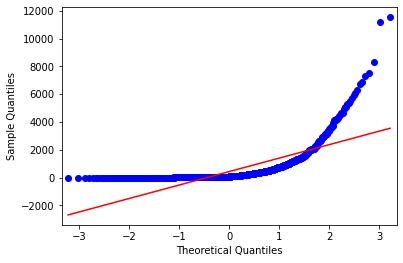

QQ plot for the natural log of rating_five_count against the normal distribution


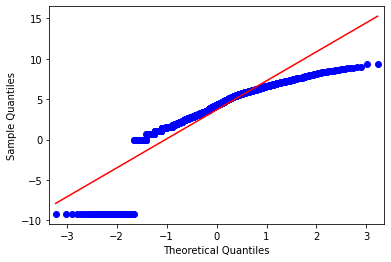

-----------------
QQ plot for rating_four_count against the normal distribution


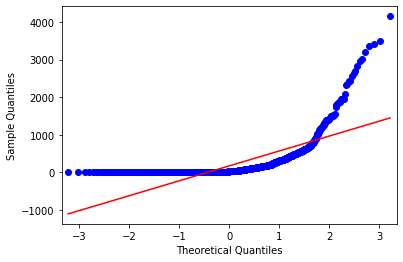

QQ plot for the natural log of rating_four_count against the normal distribution


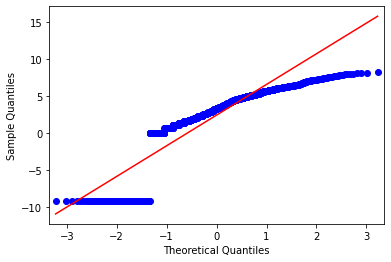

-----------------
QQ plot for rating_three_count against the normal distribution


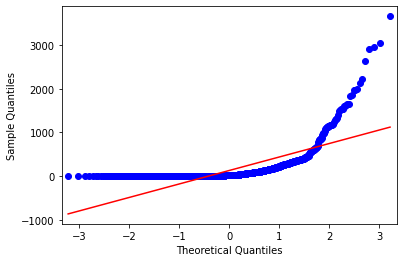

QQ plot for the natural log of rating_three_count against the normal distribution


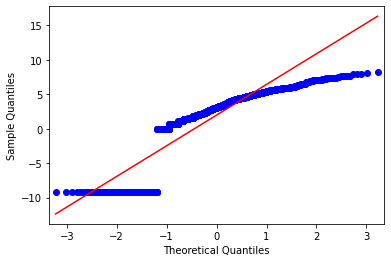

-----------------
QQ plot for rating_two_count against the normal distribution


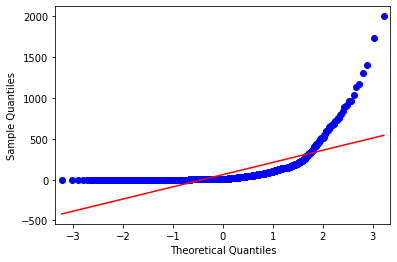

QQ plot for the natural log of rating_two_count against the normal distribution


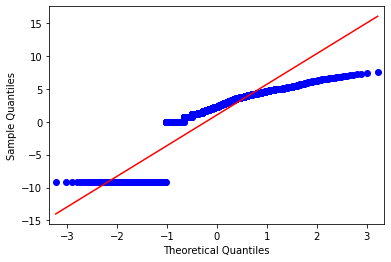

-----------------
QQ plot for rating_one_count against the normal distribution


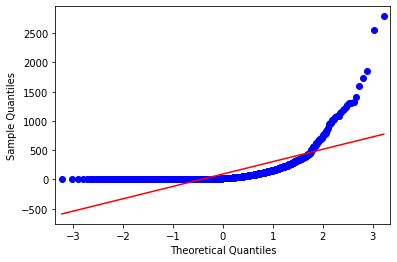

QQ plot for the natural log of rating_one_count against the normal distribution


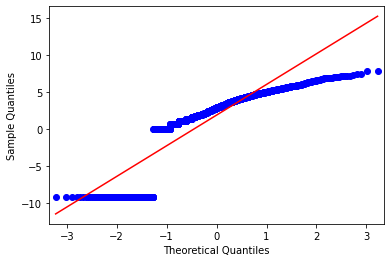

-----------------
QQ plot for merchant_rating_count against the normal distribution


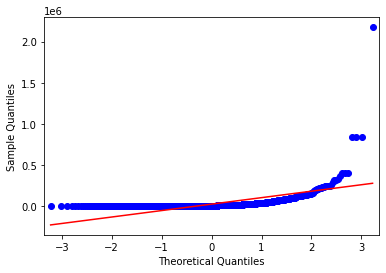

QQ plot for the natural log of merchant_rating_count against the normal distribution


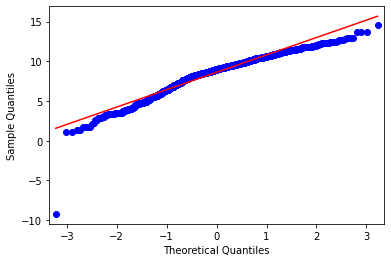

-----------------
QQ plot for merchant_rating against the normal distribution


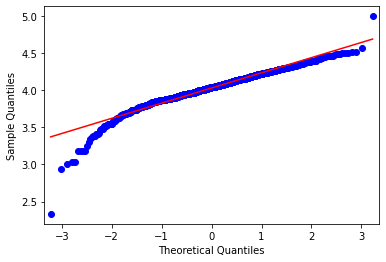

QQ plot for the natural log of merchant_rating against the normal distribution


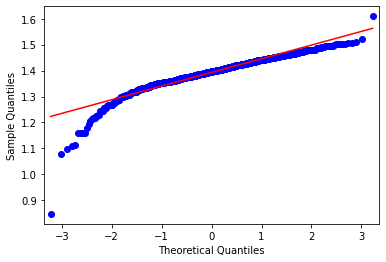

-----------------


In [130]:
import statsmodels.api as sm
import math

for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 120:

        col_array = df[col]
        
        # Defining a small number to avoid log(0)
        epsilon = 0.0001

        # Taking element wise natural log of numpy array
        col_log = [math.log(i + epsilon) for i in col_array]

        print("QQ plot for {} against the normal distribution".format(col))
        fig = sm.qqplot(df[col], line = 's')
        plt.show()

        print("QQ plot for the natural log of {} against the normal distribution".format(col))
        fig = sm.qqplot(np.array(col_log), line = 's')
        plt.show()

        print("-----------------")

The QQ plots of all the original variables with the normal distrubution initially do not agree except for the variables price, rating and merchant_rating which give a very crude straight line fit. On taking the natural log of the variables, the variables rating, merchant_rating_count and merchant_rating somewhat agree with a normal distribution giving an approximate straight line fit indicating that they are log-normal to an extent. There is not much discerable difference between the original and log-normal plots of the variable merchant_rating though.

# Plot of Discrete Variable vs Continuous Variable

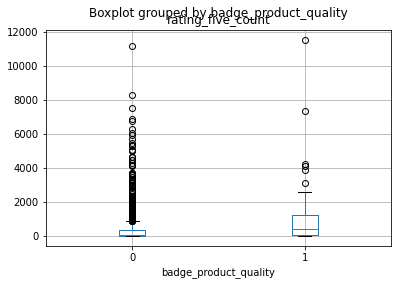

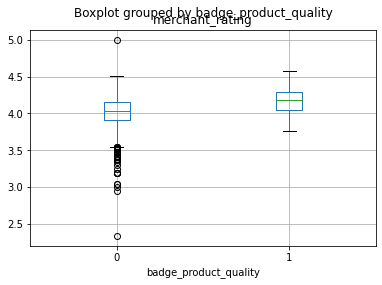

In [136]:
# Creating a box plot of the number of rating_five_counts badge_product_quality

df.boxplot(column = 'rating_five_count', by = 'badge_product_quality')

# Creating a box plot of the number of merchant_rating badge_product_quality

df.boxplot(column = 'merchant_rating', by = 'badge_product_quality')

From the above graph it can be seen that for the higher badge_product_quality value of 1, the values of the variable rating_five_count and merchant_rating  are higher.

# Correlation Heatmap of All Continuous Variables

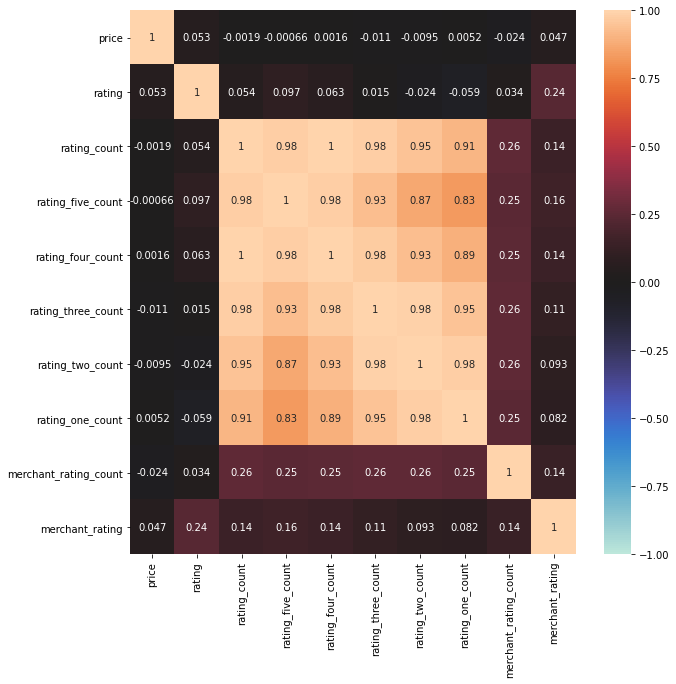

In [132]:
continuous_var = []

# Extracting continuous variable columns from the dataframe
for col in df.columns.values:

    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64') and len(pd.unique(df[col])) >= 120:

        continuous_var.append(col)

# Creating new dataframe with only continuous variables
df_continuous = df[continuous_var]

# Calculating correlation between all columns
var_corr = df_continuous.corr()

# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = True, vmin=-1, vmax=1, center= 0, ax = ax)        

From this heatmap, we can see that the strongest positive correlations are between the variables associated with rating_count such as rating_five_count, rating_four_count, etc. which is expected. The correlation values between other variables are not as significant.

# Box-Cox Normality Plot

This plot will help identify the value of the transformation parameter which when used to apply a box-cox transformation to the data, gives the distribution closest to the normal distribution.

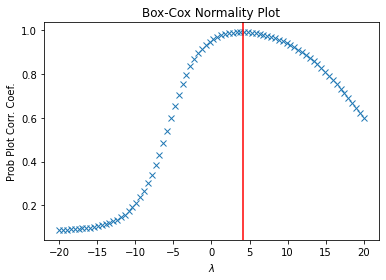

The value of lambda is:  4.150440151606905


In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Setting up the box-cox plot for the variable population for all lambda values between -20 and 20
prob = stats.boxcox_normplot(df['merchant_rating'].dropna(), -20, 20, plot = ax)

# Determining the value of lambda at which the box-cox plot maxima occurs
_, maxlog = stats.boxcox(df['merchant_rating'].dropna())

# Adding the vertical line corresponding to the maxima to the graph
ax.axvline(maxlog, color='r')

plt.show()

print("The value of lambda is: ", maxlog)

QQ plot for merchant_rating against the normal distribution


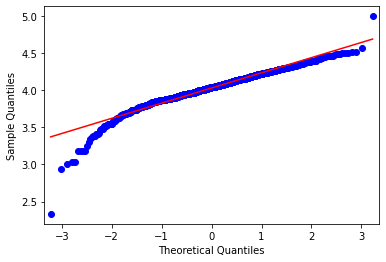

QQ plot for transformed merchant_rating against the normal distribution


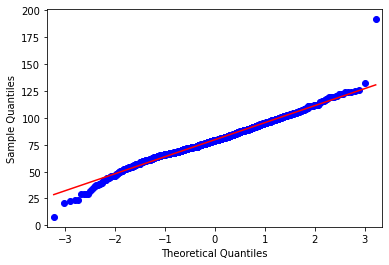

In [134]:
merchant_rating = np.array(df['merchant_rating'])

# Applying box-cox transformation to the data
tr_rating = np.power(merchant_rating, maxlog)
tr_rating = (tr_rating - 1)/float(maxlog)

# QQ plot of the original merchant_rating data
print("QQ plot for merchant_rating against the normal distribution")
fig = sm.qqplot(merchant_rating, line = 's')
plt.show()

# QQ plot of the transformed merchant_rating data
print("QQ plot for transformed merchant_rating against the normal distribution")
fig = sm.qqplot(tr_rating, line = 's')
plt.show()

From the box-cox plot of merchant_rating it's visible that the value of the transformation parameter is about 4, which gives a stronger fit to the straight line than the log transformation.